# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# Get weather data
url = "http://api.openweathermap.org/data/2.5/weather?"

new_df=pd.DataFrame()
new_df["City"]=""
new_df["Cloudiness"]=""
new_df["Country"]=""
new_df["Date"]=""
new_df["Humidity"]=""
new_df["Lat"]=""
new_df["Lng"]=""
new_df["Max Temp"]=""
new_df["Wind Speed"]=""
record=0
set=0
print("Beginning Data Retrieval")
print("-------------------------------")
for x in range(len(cities)):
    try:
        query_url = url+"appid="+api_key+"&q="+cities[x]+"&units=imperial"
        response=requests.get(query_url).json()
        new_df.loc[x,"Cloudiness"]=response["clouds"]["all"]
        new_df.loc[x,"City"]=cities[x]
        new_df.loc[x,"Country"]=response["sys"]["country"]
        new_df.loc[x,"Date"]=response["dt"]
        new_df.loc[x,"Humidity"]=response["main"]["humidity"]
        new_df.loc[x,"Lat"]=response["coord"]["lat"]
        new_df.loc[x,"Lng"]=response["coord"]["lon"]
        new_df.loc[x,"Max Temp"]=response["main"]["temp_max"]
        new_df.loc[x,"Wind Speed"]=response["wind"]["speed"]
        print("Processing Record "+str(record)+" of Set "+str(set)+" | "+cities[x])
        print(query_url)
        if record<49:
            record=record+1
        elif record==49:
            record=0
            set=set+1
    except:
        print("City not found. Skipping...")
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")


Beginning Data Retrieval
-------------------------------
Processing Record 0 of Set 0 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=port alfred&units=imperial
Processing Record 1 of Set 0 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=pevek&units=imperial
Processing Record 2 of Set 0 | palotina
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=palotina&units=imperial
Processing Record 3 of Set 0 | albany
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=albany&units=imperial
Processing Record 4 of Set 0 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=hermanus&units=imperial
Processing Record 5 of Set 0 | east london
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=east london&units=imperial
Processing Record 6 of Set 0 

Processing Record 3 of Set 1 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=comodoro rivadavia&units=imperial
Processing Record 4 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=busselton&units=imperial
Processing Record 5 of Set 1 | baculin
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=baculin&units=imperial
Processing Record 6 of Set 1 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=avarua&units=imperial
Processing Record 7 of Set 1 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=alofi&units=imperial
Processing Record 8 of Set 1 | svetlyy yar
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=svetlyy yar&units=imperial
Processing Record 9 of Set 1 | saldanha
http://api.openweathermap.org/da

Processing Record 5 of Set 2 | chase
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=chase&units=imperial
Processing Record 6 of Set 2 | gouyave
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=gouyave&units=imperial
Processing Record 7 of Set 2 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=ilulissat&units=imperial
Processing Record 8 of Set 2 | tungor
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=tungor&units=imperial
Processing Record 9 of Set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=qaanaaq&units=imperial
Processing Record 10 of Set 2 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=saint george&units=imperial
Processing Record 11 of Set 2 | oriximina
http://api.openweathermap.org/data/2.5/weather?ap

Processing Record 9 of Set 3 | koslan
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=koslan&units=imperial
Processing Record 10 of Set 3 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=cabo san lucas&units=imperial
Processing Record 11 of Set 3 | kayerkan
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=kayerkan&units=imperial
Processing Record 12 of Set 3 | samtredia
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=samtredia&units=imperial
Processing Record 13 of Set 3 | lasa
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=lasa&units=imperial
Processing Record 14 of Set 3 | xining
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=xining&units=imperial
Processing Record 15 of Set 3 | cidreira
http://api.openweathermap.org/data/2.5/weath

Processing Record 11 of Set 4 | vao
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=vao&units=imperial
Processing Record 12 of Set 4 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=cherskiy&units=imperial
Processing Record 13 of Set 4 | kieta
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=kieta&units=imperial
Processing Record 14 of Set 4 | kachiry
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=kachiry&units=imperial
Processing Record 15 of Set 4 | vaitape
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=vaitape&units=imperial
Processing Record 16 of Set 4 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=ancud&units=imperial
City not found. Skipping...
Processing Record 17 of Set 4 | pacifica
http://api.openweathermap.org/data/2.5/

Processing Record 15 of Set 5 | wattegama
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=wattegama&units=imperial
Processing Record 16 of Set 5 | kisangani
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=kisangani&units=imperial
Processing Record 17 of Set 5 | zapolyarnyy
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=zapolyarnyy&units=imperial
Processing Record 18 of Set 5 | belmonte
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=belmonte&units=imperial
Processing Record 19 of Set 5 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=luderitz&units=imperial
City not found. Skipping...
Processing Record 20 of Set 5 | preston
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=preston&units=imperial
Processing Record 21 of Set 5 | pailon
http://

City not found. Skipping...
Processing Record 18 of Set 6 | praya
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=praya&units=imperial
Processing Record 19 of Set 6 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=verkhnevilyuysk&units=imperial
Processing Record 20 of Set 6 | high level
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=high level&units=imperial
Processing Record 21 of Set 6 | cam ranh
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=cam ranh&units=imperial
Processing Record 22 of Set 6 | taua
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=taua&units=imperial
Processing Record 23 of Set 6 | maun
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=maun&units=imperial
Processing Record 24 of Set 6 | ucar
http://api.openweathe

Processing Record 22 of Set 7 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=san patricio&units=imperial
Processing Record 23 of Set 7 | lima
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=lima&units=imperial
Processing Record 24 of Set 7 | grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=grand gaube&units=imperial
Processing Record 25 of Set 7 | chalchihuites
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=chalchihuites&units=imperial
Processing Record 26 of Set 7 | keningau
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=keningau&units=imperial
Processing Record 27 of Set 7 | touros
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=touros&units=imperial
City not found. Skipping...
Processing Record 28 of Set 7 | oga
http:/

Processing Record 26 of Set 8 | arlit
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=arlit&units=imperial
Processing Record 27 of Set 8 | madimba
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=madimba&units=imperial
Processing Record 28 of Set 8 | smithers
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=smithers&units=imperial
Processing Record 29 of Set 8 | atherton
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=atherton&units=imperial
Processing Record 30 of Set 8 | sirsa
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=sirsa&units=imperial
Processing Record 31 of Set 8 | maniwaki
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=maniwaki&units=imperial
Processing Record 32 of Set 8 | birzai
http://api.openweathermap.org/data/2.5/weather?appid=1374

Processing Record 29 of Set 9 | marystown
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=marystown&units=imperial
Processing Record 30 of Set 9 | darnah
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=darnah&units=imperial
Processing Record 31 of Set 9 | xuchang
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=xuchang&units=imperial
Processing Record 32 of Set 9 | athabasca
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=athabasca&units=imperial
Processing Record 33 of Set 9 | mezen
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=mezen&units=imperial
City not found. Skipping...
Processing Record 34 of Set 9 | mutsu
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=mutsu&units=imperial
Processing Record 35 of Set 9 | gao
http://api.openweathermap.org/da

Processing Record 32 of Set 10 | tymovskoye
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=tymovskoye&units=imperial
Processing Record 33 of Set 10 | linqiong
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=linqiong&units=imperial
Processing Record 34 of Set 10 | rodrigues alves
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=rodrigues alves&units=imperial
Processing Record 35 of Set 10 | tricase
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=tricase&units=imperial
Processing Record 36 of Set 10 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=pangnirtung&units=imperial
Processing Record 37 of Set 10 | dalianwan
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=dalianwan&units=imperial
Processing Record 38 of Set 10 | port hedland
http:/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
new_df.to_csv("./Images/WeatherPy.csv", encoding="utf-8", index=False)


In [19]:
new_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port alfred,0,ZA,1554333424,80,-33.59,26.89,64,6.17
1,pevek,0,RU,1554333627,79,69.7,170.27,25.7,2.59
2,palotina,88,BR,1554333501,92,-24.28,-53.84,72.68,7.96
3,albany,20,US,1554333319,39,42.65,-73.75,48,17.22
4,hermanus,48,ZA,1554333513,74,-34.42,19.24,60.01,3


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

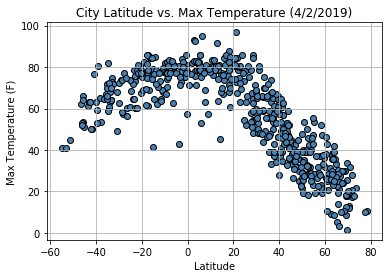

In [20]:
plt.scatter(new_df["Lat"],new_df["Max Temp"],color="steelblue", alpha=1, marker="o", linewidth=1, edgecolors="black")
plt.title("City Latitude vs. Max Temperature (4/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("./Images/Lat_vs_Max_Temp.png")

#### Latitude vs. Humidity Plot

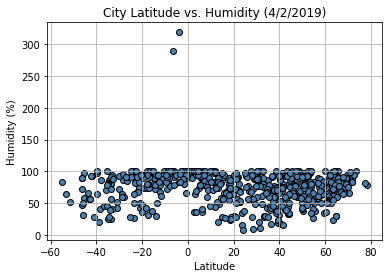

In [21]:
plt.scatter(new_df["Lat"],new_df["Humidity"],color="steelblue", alpha=1, marker="o", linewidth=1, edgecolors="black")
plt.title("City Latitude vs. Humidity (4/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("./Images/Lat_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

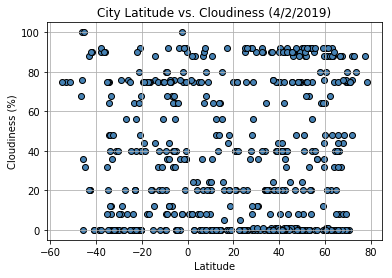

In [8]:
plt.scatter(new_df["Lat"],new_df["Cloudiness"],color="steelblue", alpha=1, marker="o", linewidth=1, edgecolors="black")
plt.title("City Latitude vs. Cloudiness (4/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("./Images/Lat_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

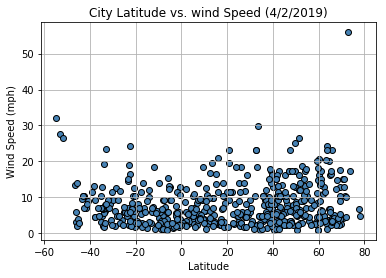

In [9]:
plt.scatter(new_df["Lat"],new_df["Wind Speed"],color="steelblue", alpha=1, marker="o", linewidth=1, edgecolors="black")
plt.title("City Latitude vs. wind Speed (4/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("./Images/Lat_vs_Wind_Speed.png")

In [11]:
#new_df.loc[new_df["Humidity"]>200]
#query_url = url+"appid="+api_key+"&q="+"talara"+"&units=imperial"
#response=requests.get(query_url).json()
#pprint(response)